In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

df = pd.read_csv("../data/news.csv")  # <-- put your dataset here
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df["headline_length"] = df["headline"].astype(str).apply(len)
df["headline_length"].describe()
# df.head()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [6]:
publisher_counts = df["publisher"].value_counts()
publisher_counts


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

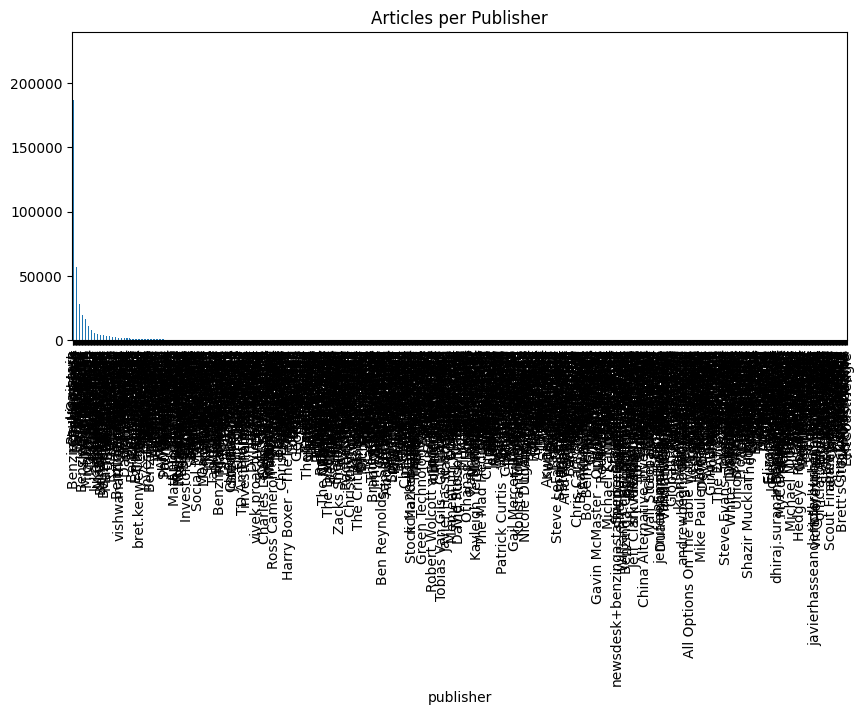

In [7]:
publisher_counts.plot(kind="bar", figsize=(10,4), title="Articles per Publisher")
plt.show()


In [9]:
df["date"] = pd.to_datetime(df["date"], format="mixed", errors="coerce")


C:\Users\Owner\AppData\Local\Temp\ipykernel_15340\3720786897.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["date"] = pd.to_datetime(df["date"], format="mixed", errors="coerce")


In [11]:
df["date"] = (
    pd.to_datetime(df["date"], format="mixed", errors="coerce")
      .dt.tz_localize(None)  # remove timezone if present
)


In [17]:
df[df["date"].isna()].head()


,Unnamed: 0,headline,url,publisher,date,stock,headline_length


In [13]:
df = df.dropna(subset=["date"])


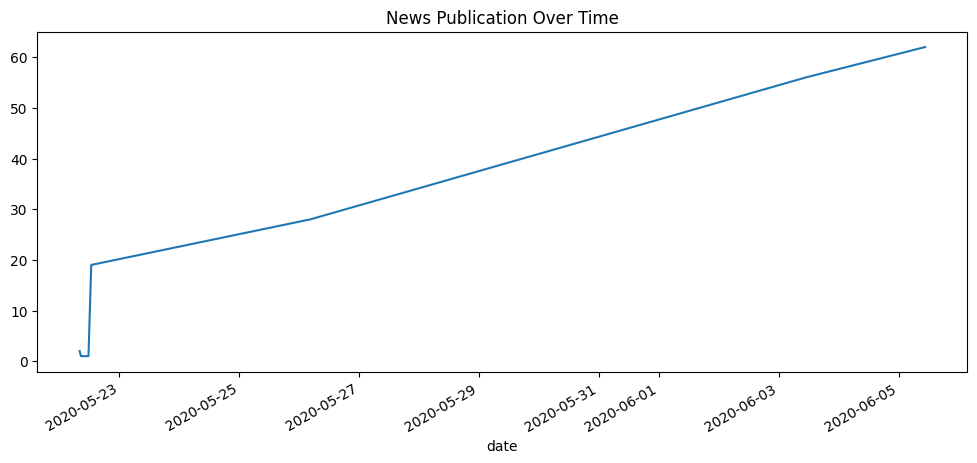

In [14]:
df["date"] = pd.to_datetime(df["date"])
df["date"].value_counts().sort_index().plot(figsize=(12,5))
plt.title("News Publication Over Time")
plt.show()


In [18]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df["headline"].astype(str))
keywords = vectorizer.get_feature_names_out()[:20]
keywords


array(['10', '46', '52', '71', '85', '87', '88', '95', 'agilent',
       'better', 'biggest', 'cfra', 'changes', 'company', 'day', 'eps',
       'expected', 'fargo', 'friday', 'higher'], dtype=object)

In [19]:
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

for i, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    print(f"Topic {i+1}: ", top_words)


Topic 1:  ['reported', '10', 'changes', 'neutral', 'raises', 'maintains', 'agilent', 'technologies', 'price', 'target']
Topic 2:  ['46', 'mid', 'moving', 'day', 'session', 'stocks', 'movers', '71', 'biggest', 'friday']
Topic 3:  ['movers', '71', 'biggest', 'wednesday', 'friday', 'stocks', 'highs', 'week', '52', 'hit']


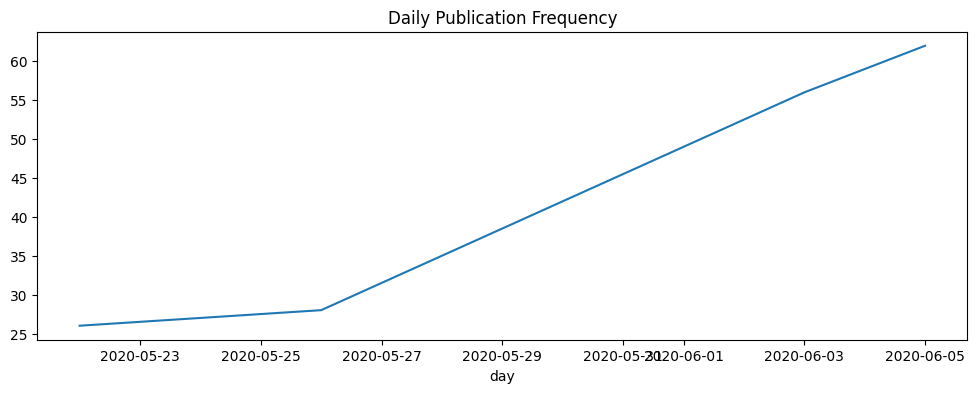

In [20]:
df["day"] = df["date"].dt.date
df.groupby("day").size().plot(figsize=(12,4))
plt.title("Daily Publication Frequency")
plt.show()


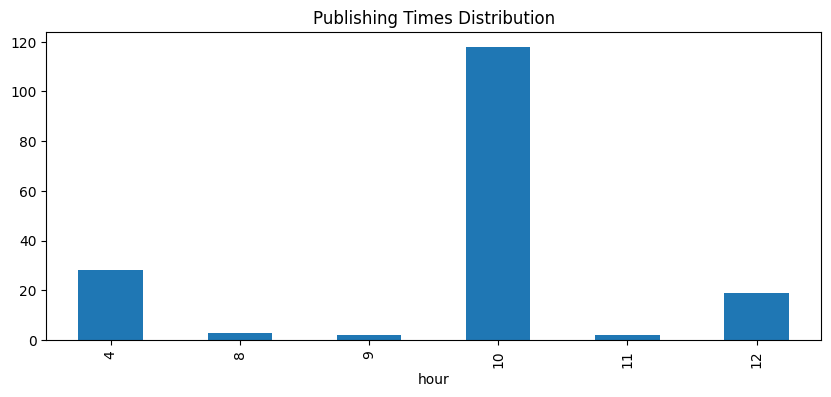

In [21]:
df["hour"] = df["date"].dt.hour
df["hour"].value_counts().sort_index().plot(kind="bar", figsize=(10,4))
plt.title("Publishing Times Distribution")
plt.show()


In [22]:
df["publisher_domain"] = df["publisher"].astype(str).apply(lambda x: x.split("@")[-1] if "@" in x else x)
df["publisher_domain"].value_counts().head(10)


publisher_domain
Benzinga Insights    118
Lisa Levin            49
benzinga.com           3
Vick Meyer             1
Benzinga Newsdesk      1
Name: count, dtype: int64